In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [39]:
# DataSet: https://www.kaggle.com/datasets/uciml/mushroom-classification
data = pd.read_csv("D:\DataSets\Predictive Analysis_ML\mushrum_dataset.csv")

# Data Understanding

In [40]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [41]:
data.shape

(8124, 23)

In [42]:
data.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4712,Poisonous,Convex,Scaly,Green,No Bruises,Foul,Free,Close,Broad,Pink,...,Silky,Buff,Pink,Partial,White,One,Large,Chocolate,Several,Grasses
3677,Edible,Flat,Scaly,Green,Bruises,None,Free,Close,Broad,Brown,...,Smooth,White,Gray,Partial,White,One,Pendant,Black,Several,Wood
3842,Edible,Flat,Fibrous,Red,Bruises,None,Free,Close,Broad,Brown,...,Smooth,Gray,Pink,Partial,White,One,Pendant,Black,Solitary,Wood
5959,Poisonous,Convex,Smooth,Green,Bruises,Foul,Free,Close,Broad,Pink,...,Smooth,White,White,Partial,White,One,Pendant,Chocolate,Scattered,Grasses
1718,Edible,Flat,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Pink,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Scattered,Grasses


In [43]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,9,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,Edible,Convex,Scaly,Brown,No Bruises,None,Free,Close,Broad,Buff,...,Smooth,White,White,Partial,White,One,Pendant,White,Several,Wood
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8124 entries, 0 to 8123

Data columns (total 23 columns):

 #   Column                    Non-Null Count  Dtype 

---  ------                    --------------  ----- 

 0   class                     8124 non-null   object

 1   cap-shape                 8124 non-null   object

 2   cap-surface               8124 non-null   object

 3   cap-color                 8124 non-null   object

 4   bruises                   8124 non-null   object

 5   odor                      8124 non-null   object

 6   gill-attachment           8124 non-null   object

 7   gill-spacing              8124 non-null   object

 8   gill-size                 8124 non-null   object

 9   gill-color                8124 non-null   object

 10  stalk-shape               8124 non-null   object

 11  stalk-root                8124 non-null   object

 12  stalk-surface-above-ring  8124 non-null   object

 13  stalk-surface-below-ring  8124 non-null   object

 14  stalk

In [45]:
data.duplicated().sum()

0

In [46]:
for i in data.columns:
    print(f'{i}: {data[i].unique()}')

class: ['Poisonous' 'Edible']

cap-shape: ['Convex' 'Bell' 'Sunken' 'Flat' 'Knobbed' 'c']

cap-surface: ['Smooth' 'Scaly' 'Fibrous' 'Grooves']

cap-color: ['Brown' 'Yellow' 'White' 'Green' 'Red' 'Pink' 'Buff' 'Purple' 'Cinnamon']

bruises: ['Bruises' 'No Bruises']

odor: ['Pungent' 'Almond' 'Anise' 'None' 'Foul' 'Creosote' 'Fishy' 'Spicy'

 'Musty']

gill-attachment: ['Free' 'Attached']

gill-spacing: ['Close' 'Crowded']

gill-size: ['Narrow' 'Broad']

gill-color: ['Black' 'Brown' 'Gray' 'Pink' 'White' 'Chocolate' 'Purple' 'Red' 'Buff'

 'Green' 'Yellow' 'Orange']

stalk-shape: ['Enlarging' 'Tapering']

stalk-root: ['Equal' 'Club' 'Bulbous' 'Rooted' '?']

stalk-surface-above-ring: ['Smooth' 'Fibrous' 'Silky' 'Scaly']

stalk-surface-below-ring: ['Smooth' 'Fibrous' 'Scaly' 'Silky']

stalk-color-above-ring: ['White' 'Gray' 'Pink' 'Brown' 'Buff' 'Red' 'Orange' 'Cinnamon' 'Yellow']

stalk-color-below-ring: ['White' 'Pink' 'Gray' 'Buff' 'Brown' 'Red' 'Yellow' 'Orange' 'Cinnamon']

veil-type:

In [47]:
for i in data.columns:
    print(data[i].value_counts())

Edible       4208

Poisonous    3916

Name: class, dtype: int64

Convex     3656

Flat       3152

Knobbed     828

Bell        452

Sunken       32

c             4

Name: cap-shape, dtype: int64

Scaly      3244

Smooth     2556

Fibrous    2320

Grooves       4

Name: cap-surface, dtype: int64

Brown       2284

Green       1856

Red         1500

Yellow      1072

White       1040

Buff         168

Pink         144

Cinnamon      44

Purple        16

Name: cap-color, dtype: int64

No Bruises    4748

Bruises       3376

Name: bruises, dtype: int64

None        3528

Foul        2160

Fishy        576

Spicy        576

Almond       400

Anise        400

Pungent      256

Creosote     192

Musty         36

Name: odor, dtype: int64

Free        7914

Attached     210

Name: gill-attachment, dtype: int64

Close      6812

Crowded    1312

Name: gill-spacing, dtype: int64

Broad     5612

Narrow    2512

Name: gill-size, dtype: int64

Buff         1728

Pink         1492

White    

In [48]:
for i in data.columns:
    print(pd.crosstab(data[i], data["class"]))
    print("-----------------------------------")

class      Edible  Poisonous

class                       

Edible       4208          0

Poisonous       0       3916

-----------------------------------

class      Edible  Poisonous

cap-shape                   

Bell          404         48

Convex       1948       1708

Flat         1596       1556

Knobbed       228        600

Sunken         32          0

c               0          4

-----------------------------------

class        Edible  Poisonous

cap-surface                   

Fibrous        1560        760

Grooves           0          4

Scaly          1504       1740

Smooth         1144       1412

-----------------------------------

class      Edible  Poisonous

cap-color                   

Brown        1264       1020

Buff           48        120

Cinnamon       32         12

Green        1048        808

Pink           56         88

Purple         16          0

Red           624        876

White         720        320

Yellow        400        672

-------

# Exploratory Data Analysis

In [49]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


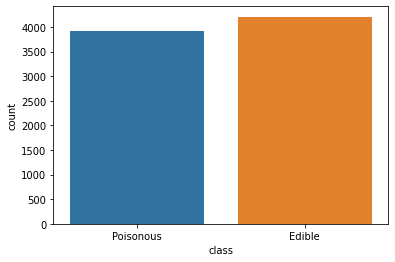

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


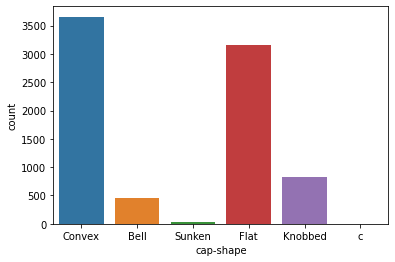

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


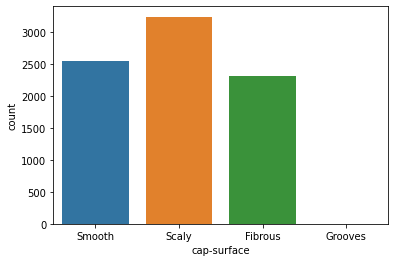

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


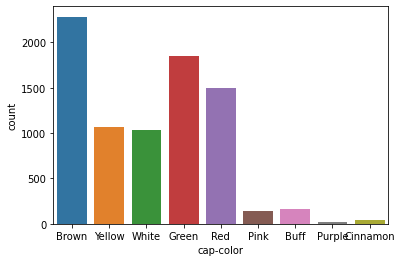

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


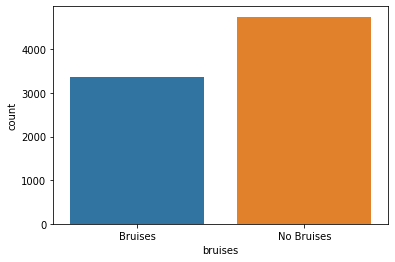

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


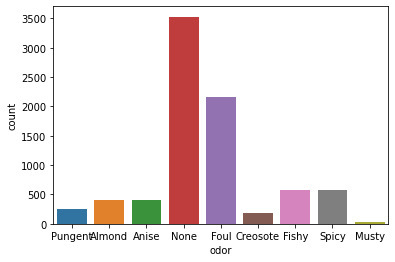

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


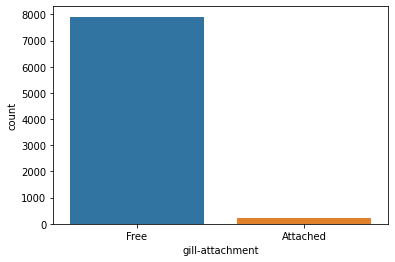

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


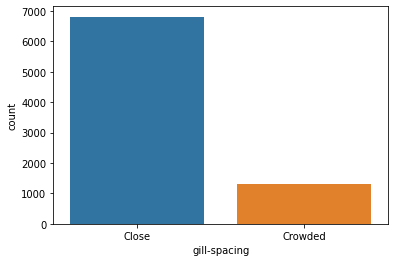

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


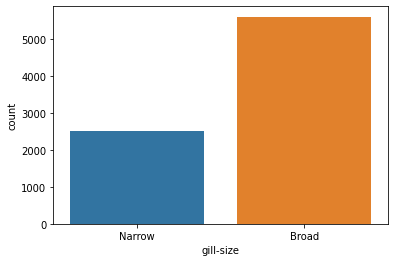

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


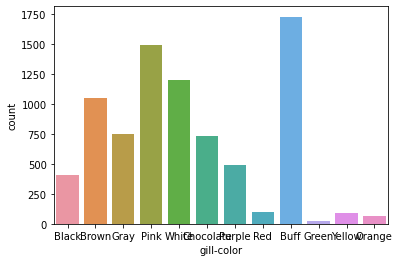

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


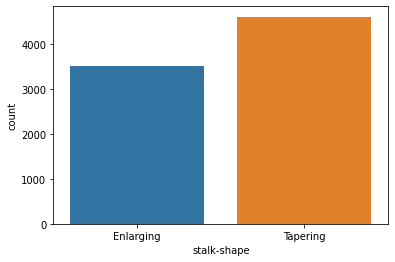

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


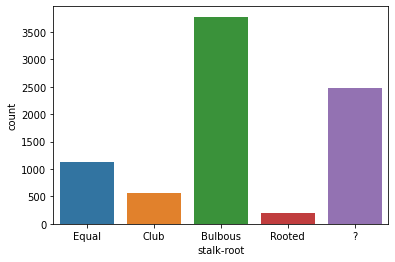

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


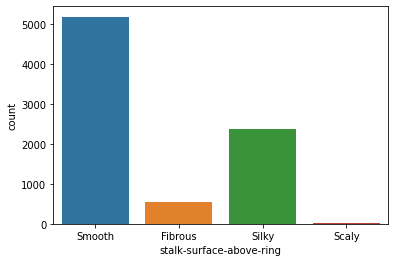

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


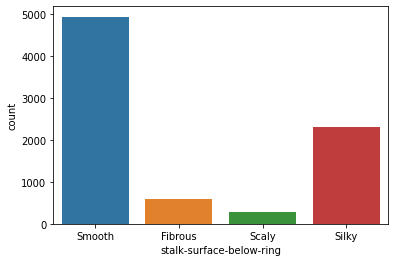

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


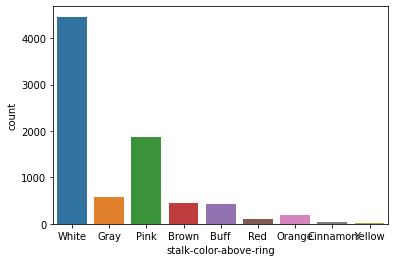

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


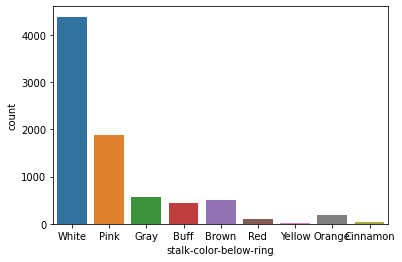

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


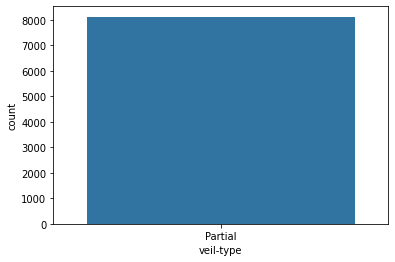

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


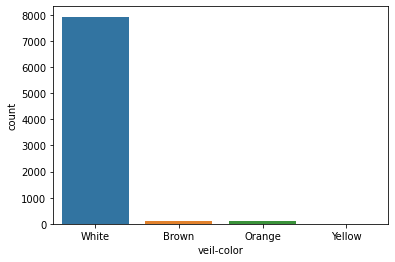

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


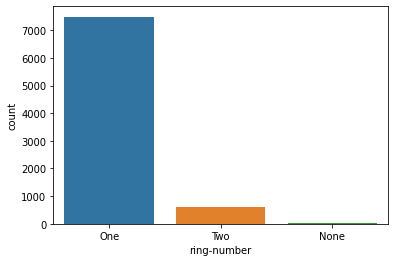

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


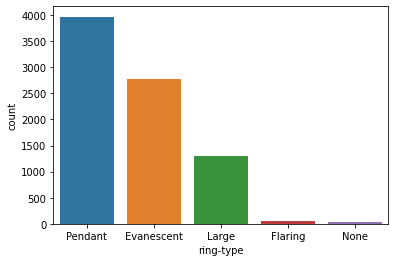

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


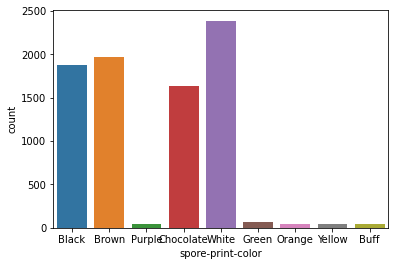

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


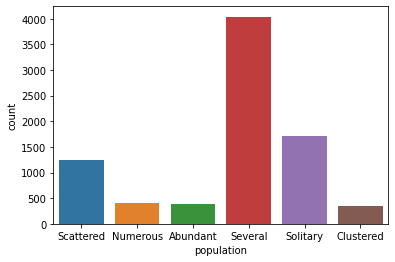

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


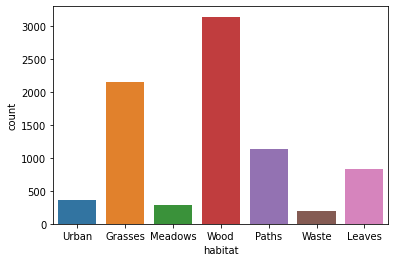

In [50]:
# Bar Plot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(sns.countplot(data[data.columns[i]]))
        #plt.xlabel(data.columns[i])

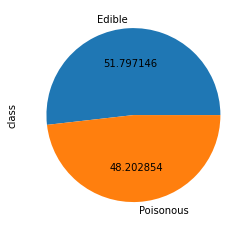

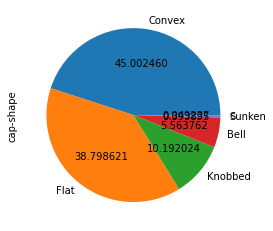

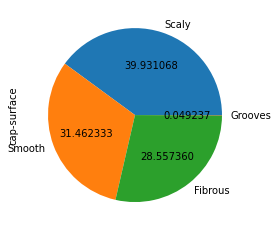

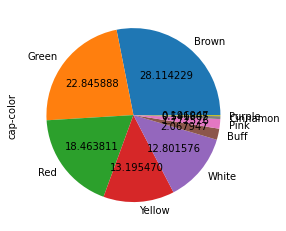

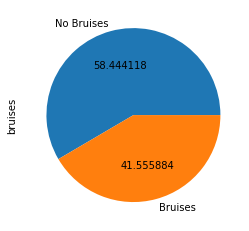

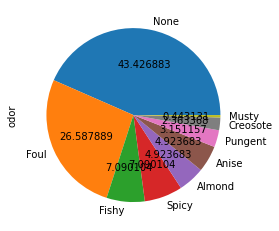

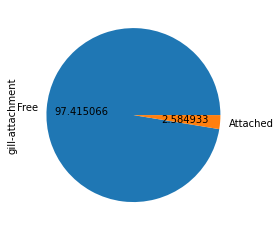

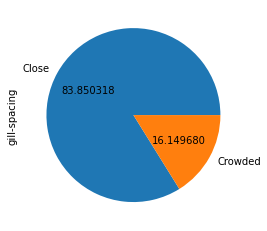

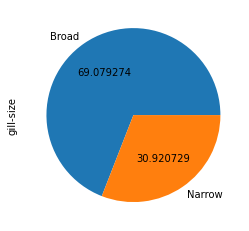

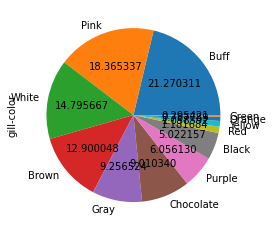

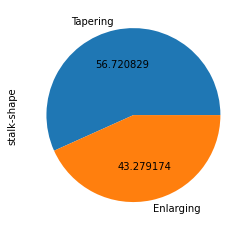

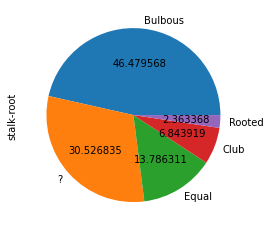

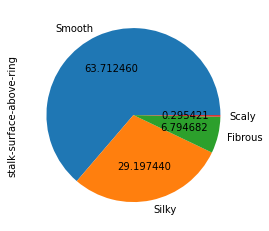

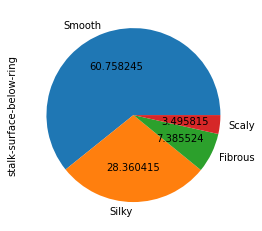

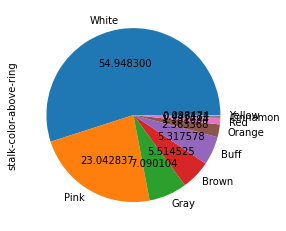

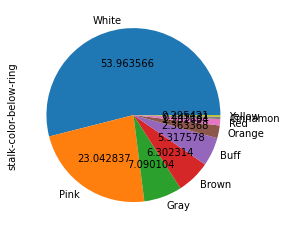

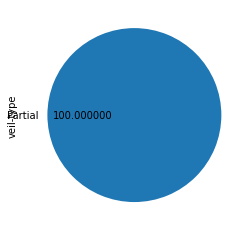

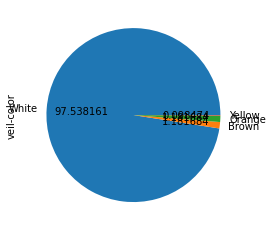

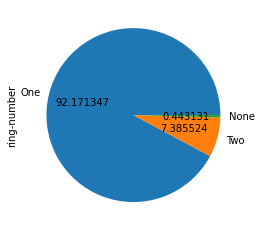

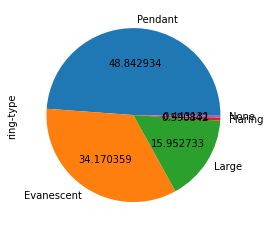

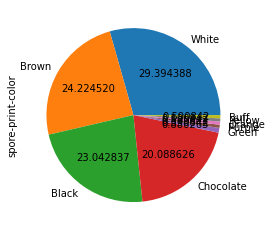

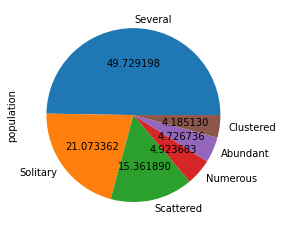

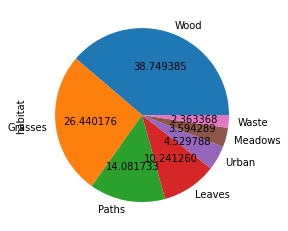

In [51]:
# Pie Chart
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(data[data.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

Bivariant Analysis

1. HeatMap

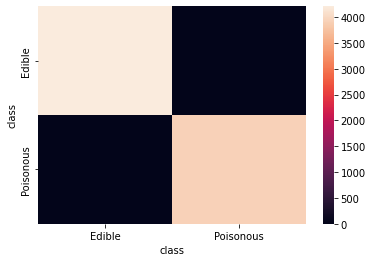

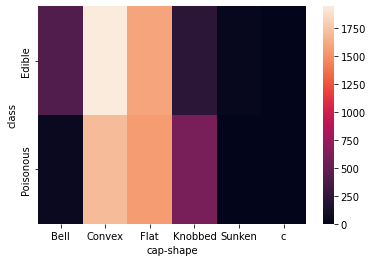

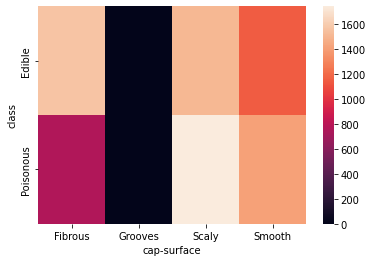

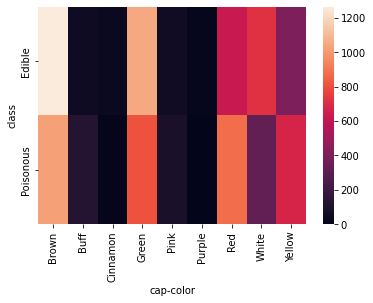

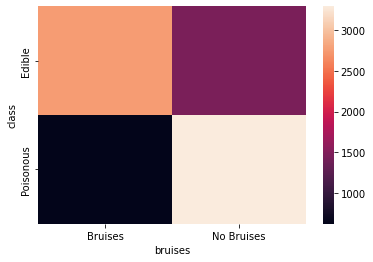

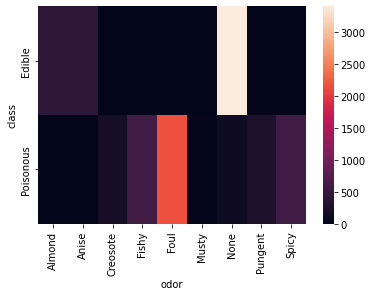

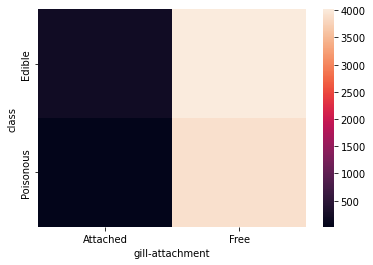

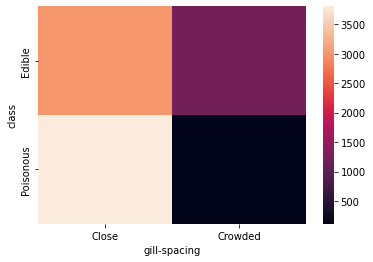

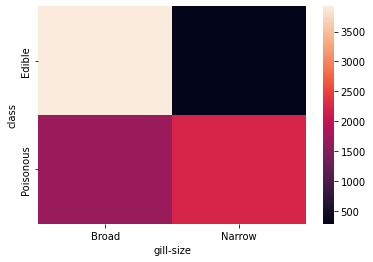

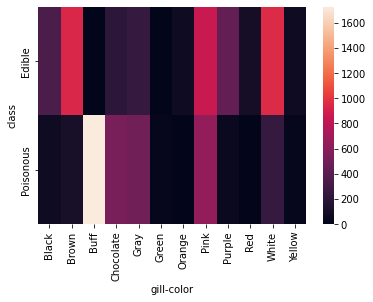

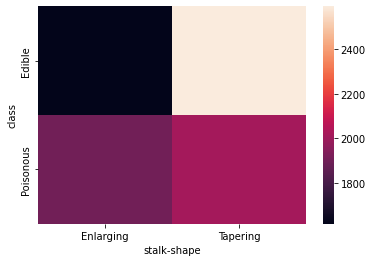

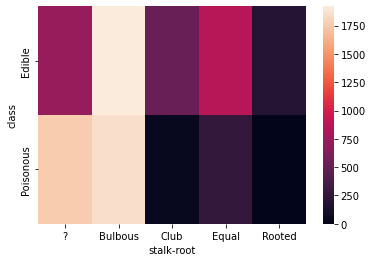

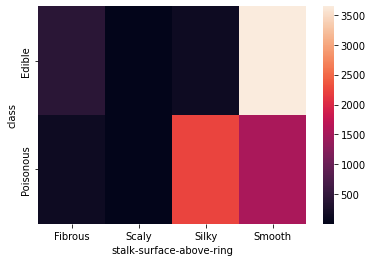

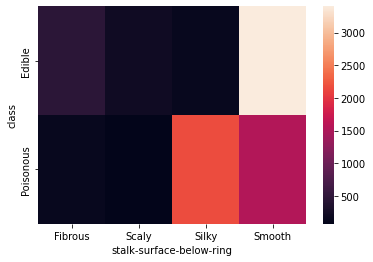

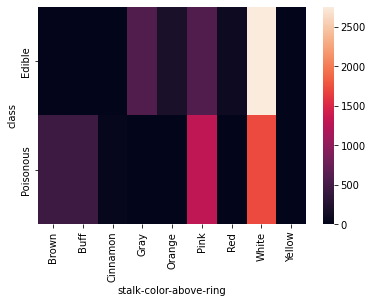

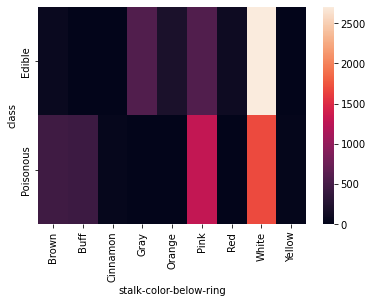

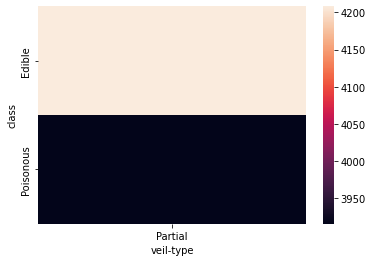

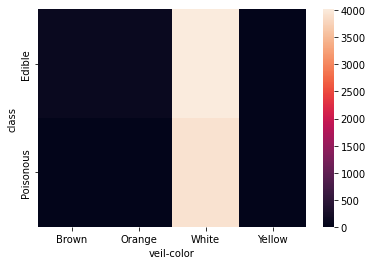

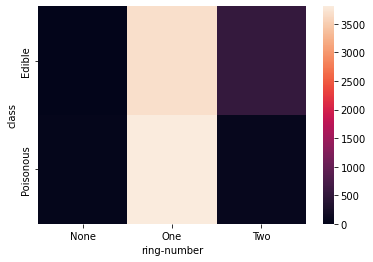

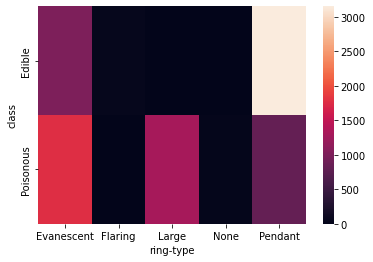

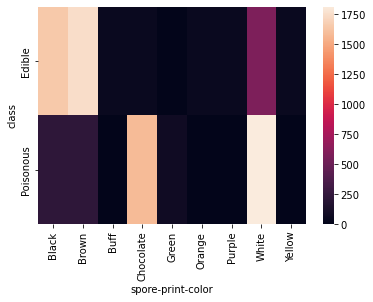

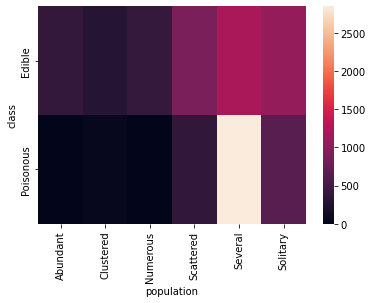

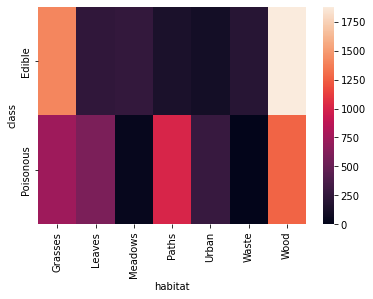

In [52]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(sns.heatmap(pd.crosstab(data["class"], data[data.columns[i]])))

2. ClusterMap

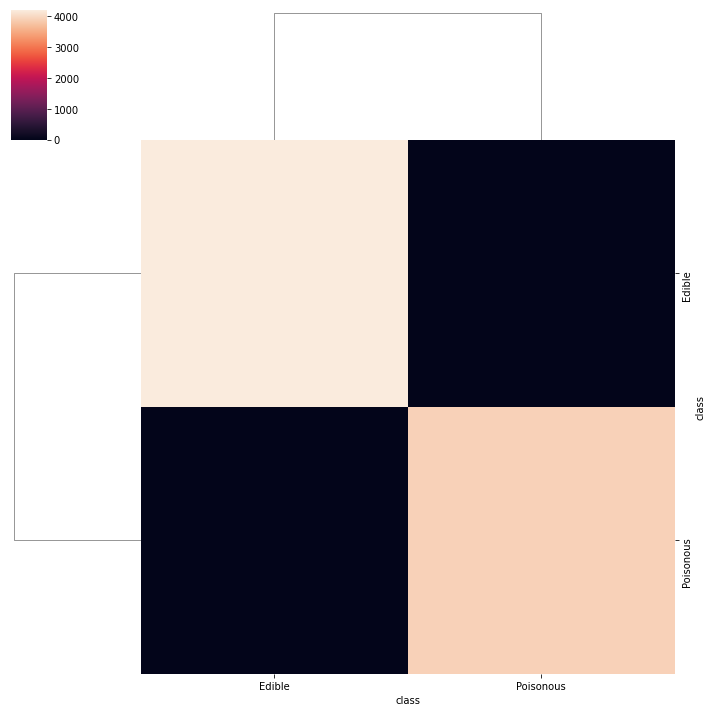

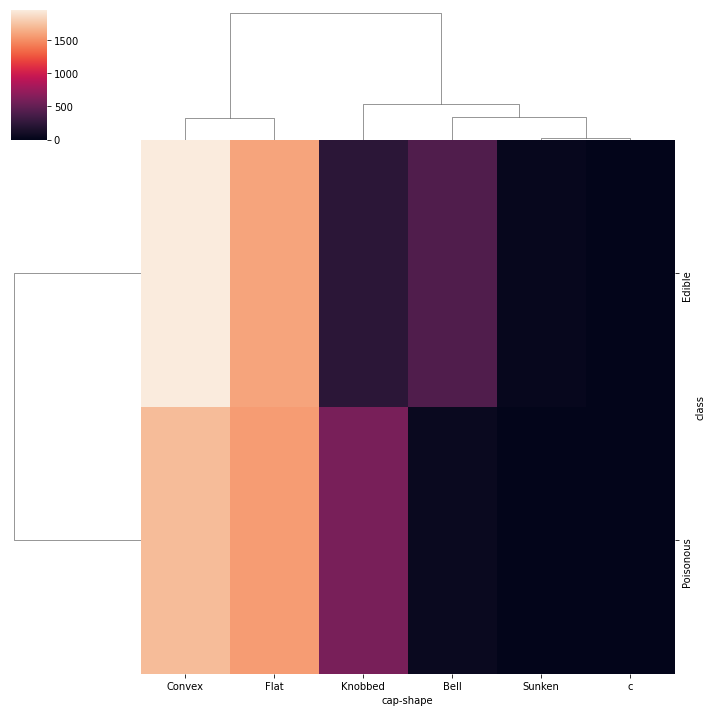

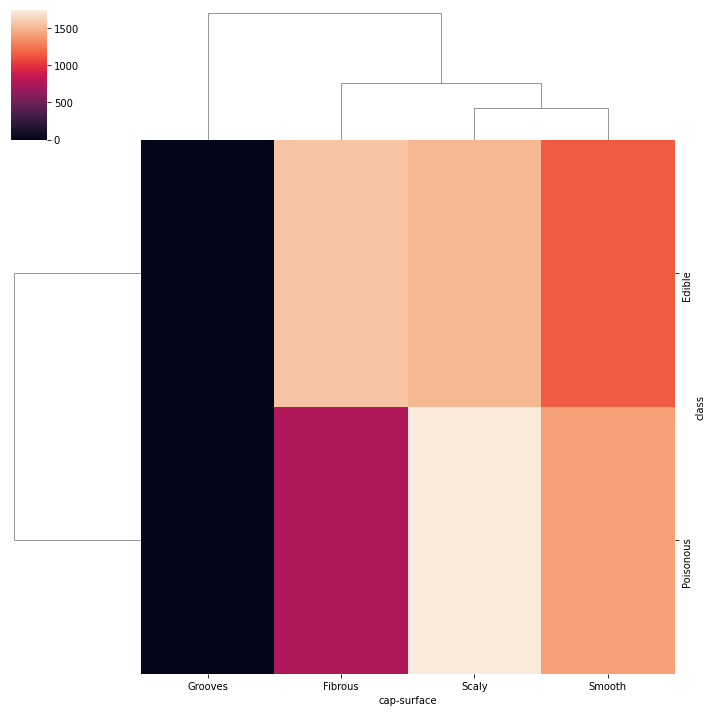

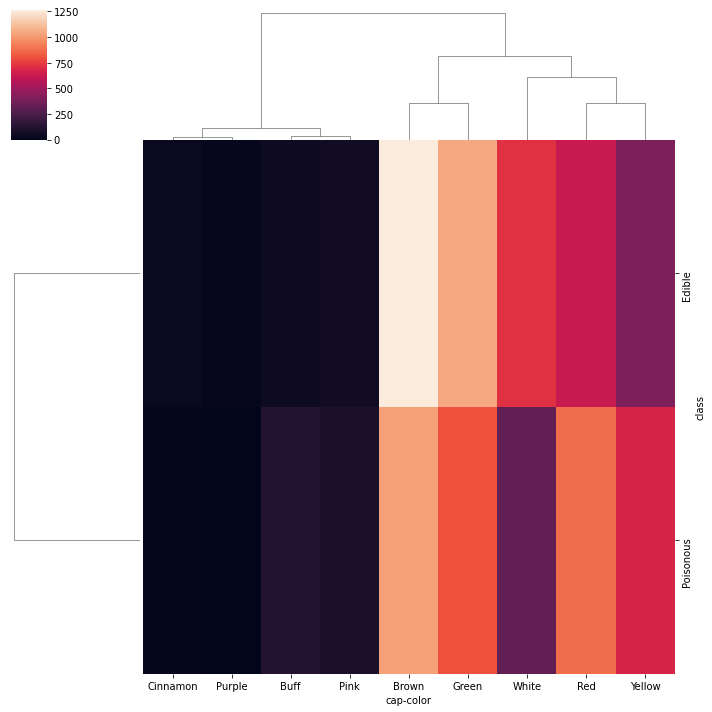

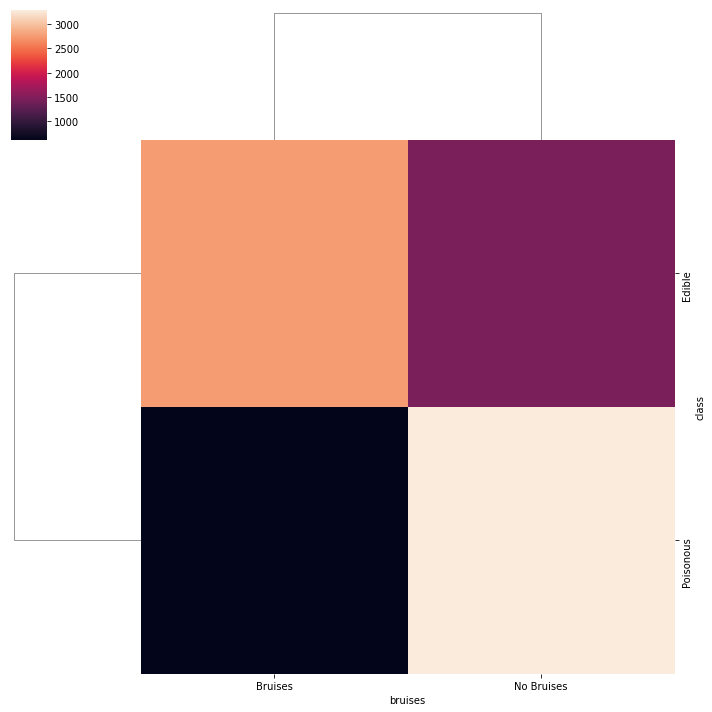

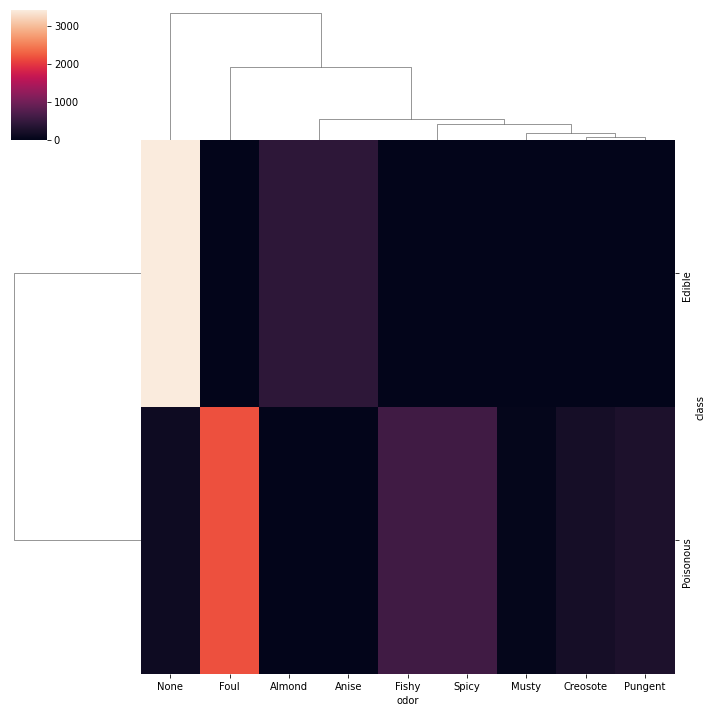

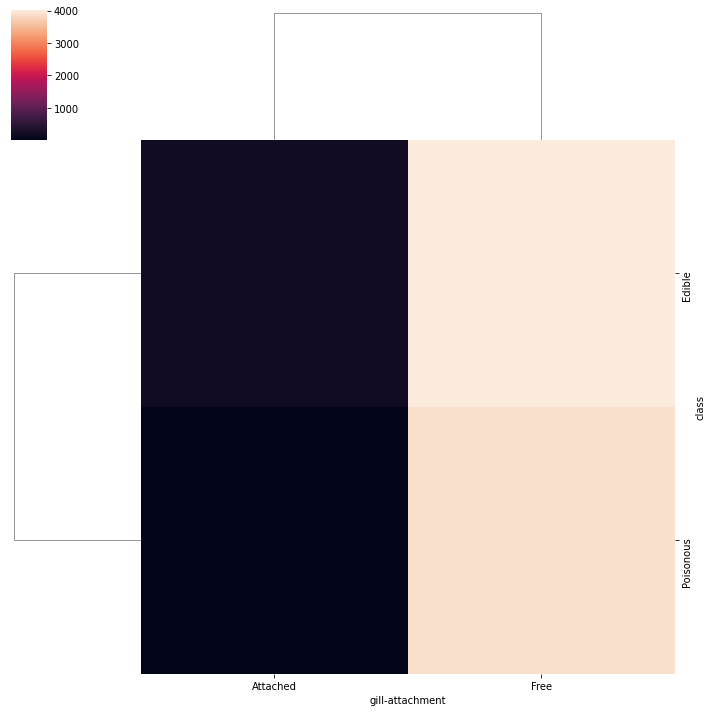

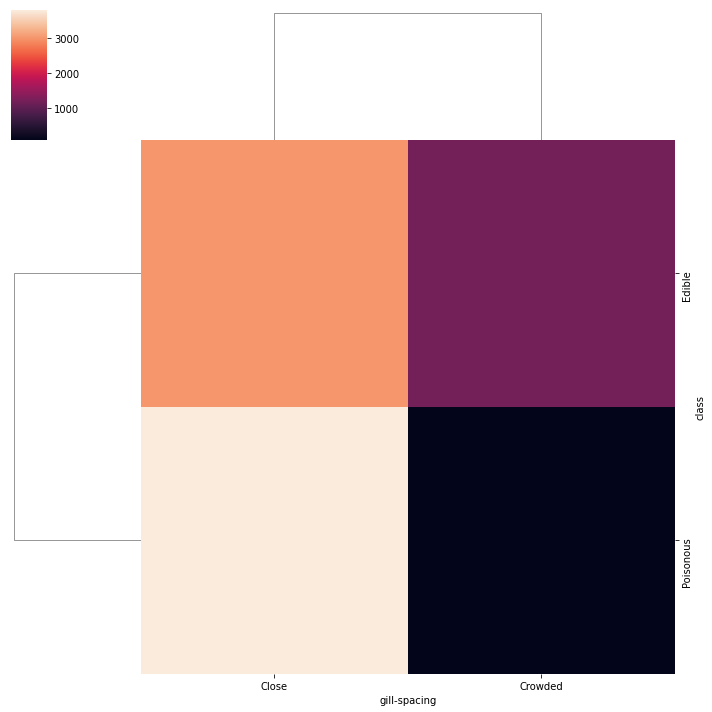

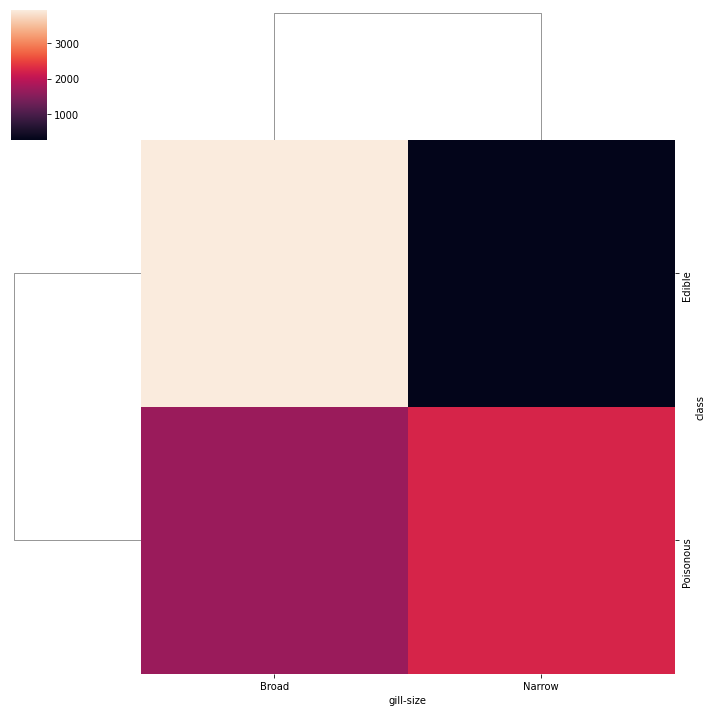

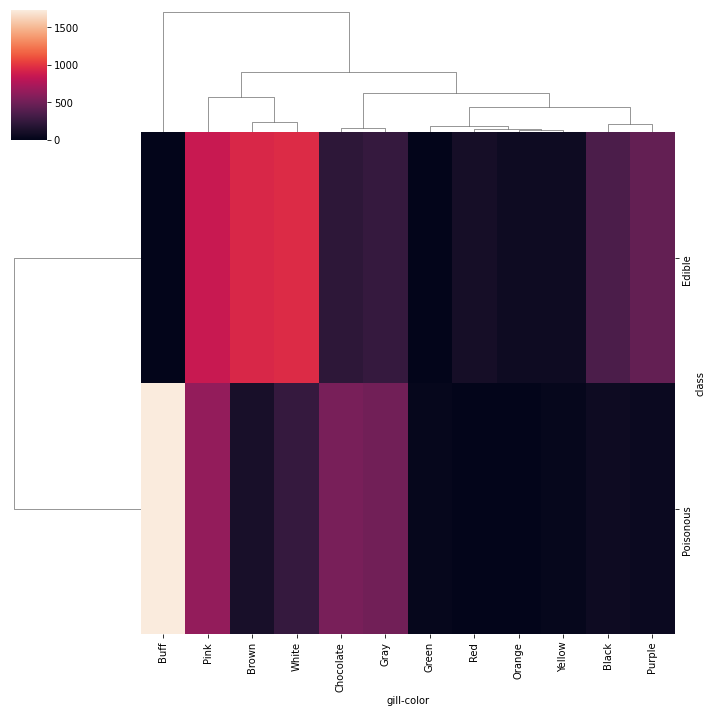

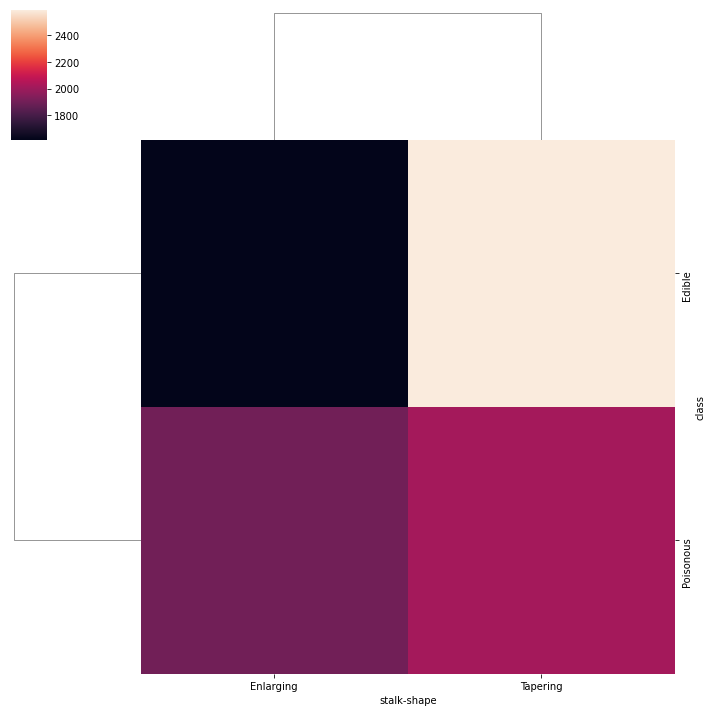

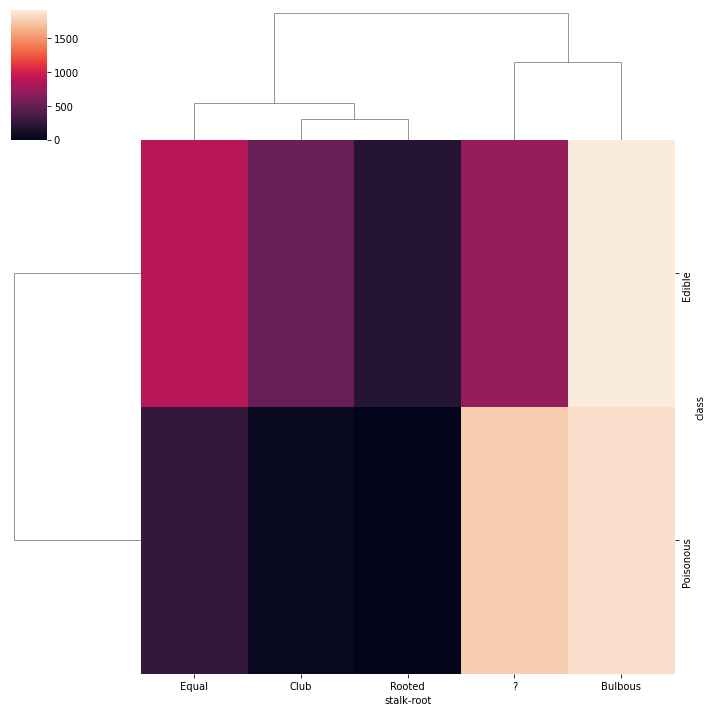

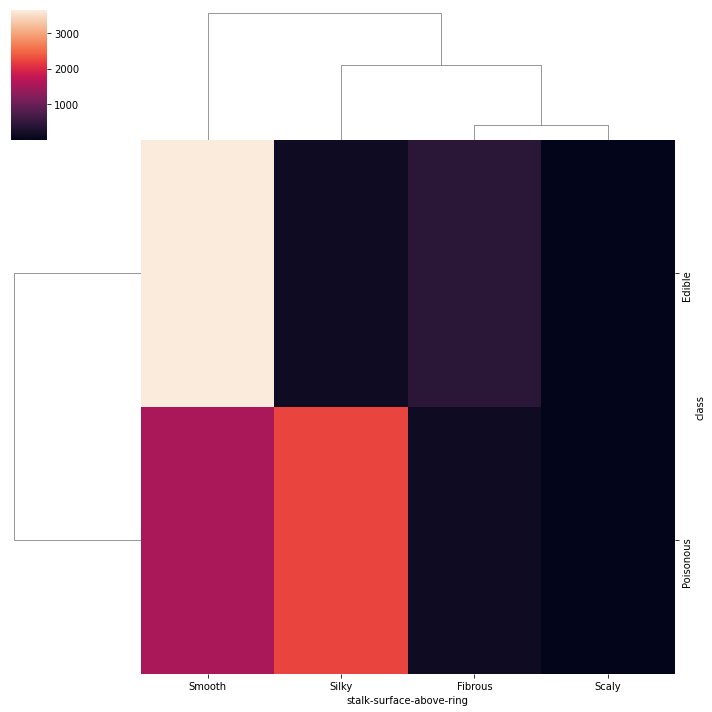

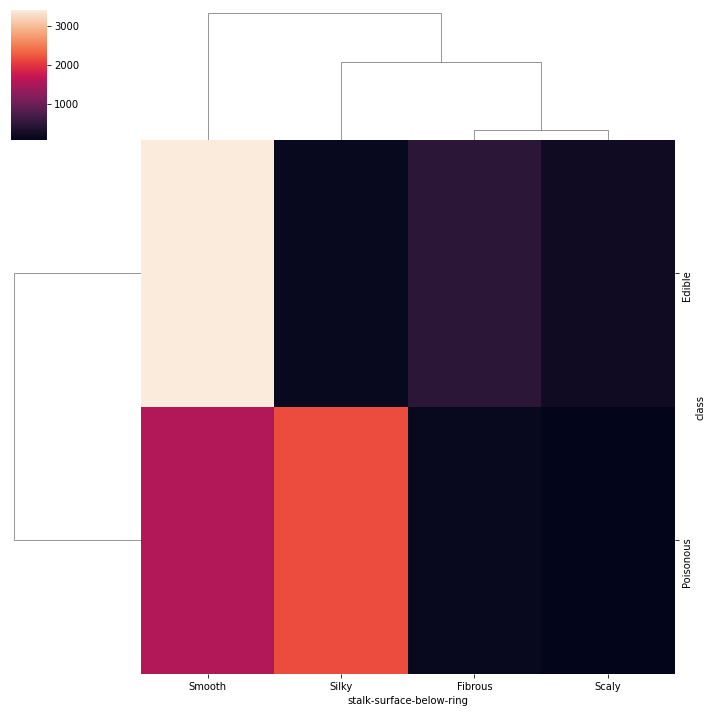

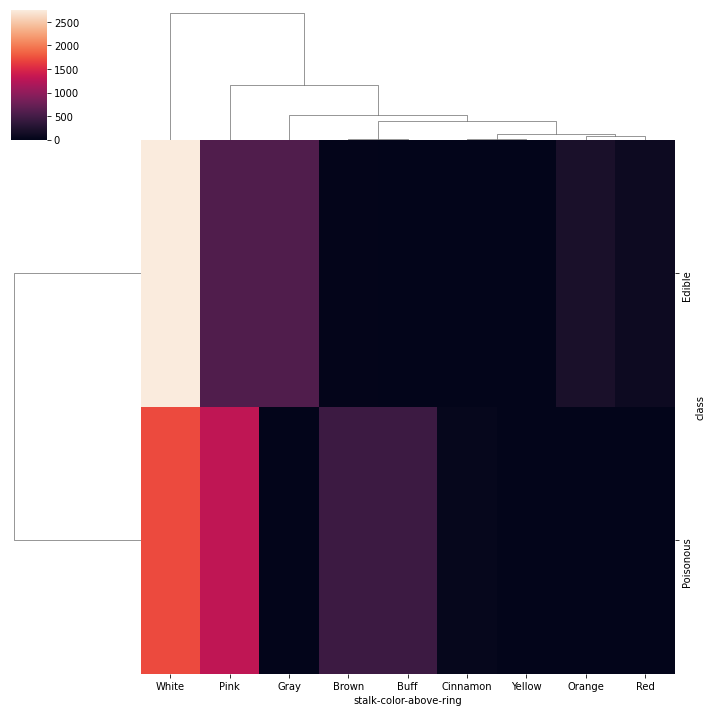

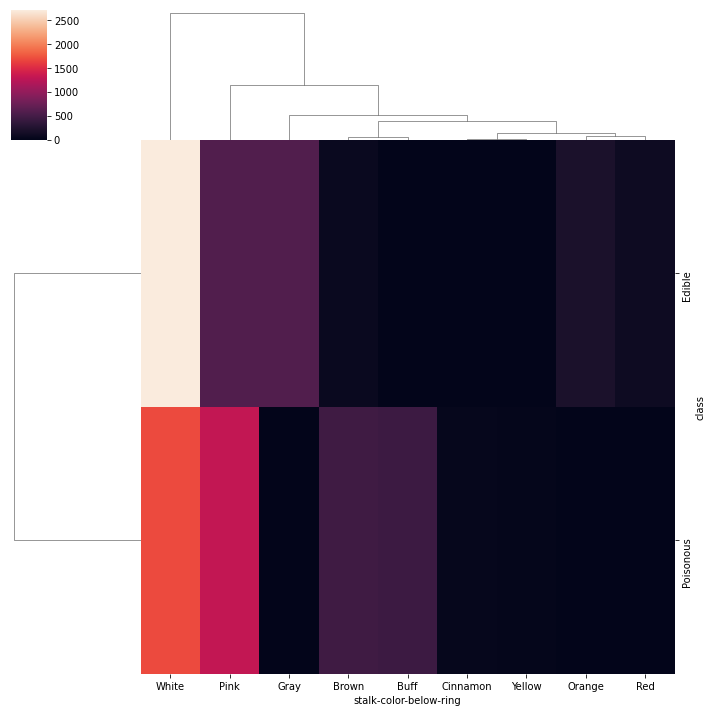

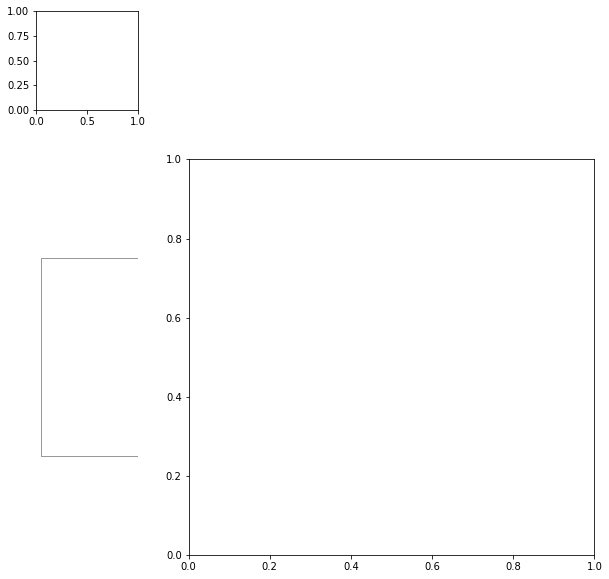

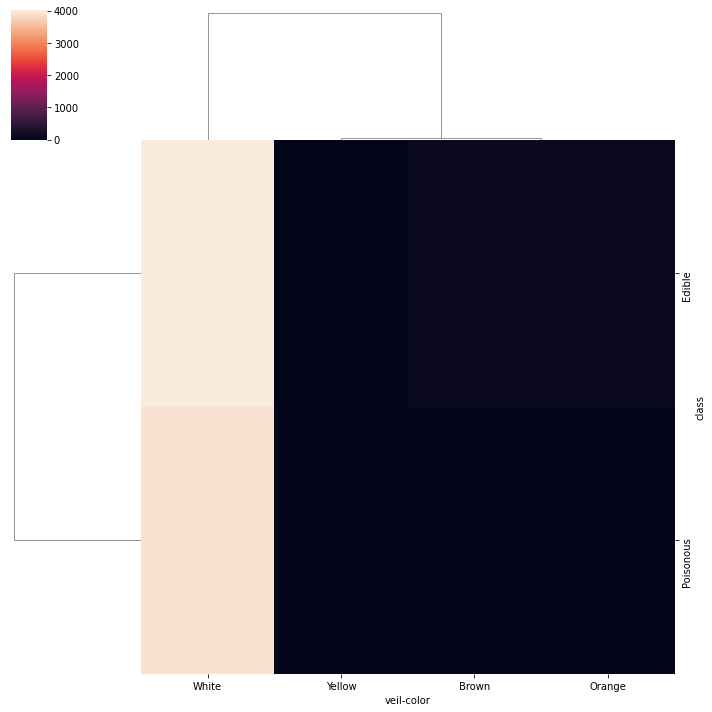

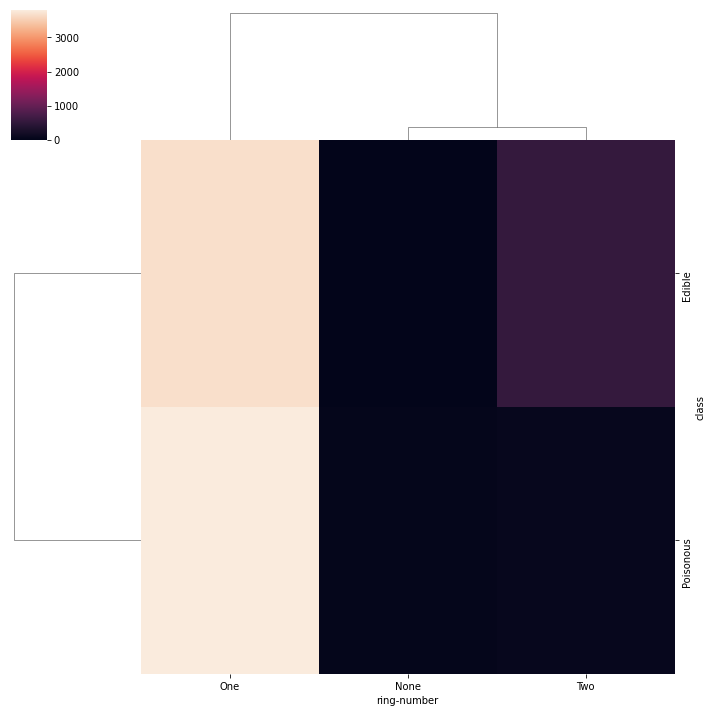

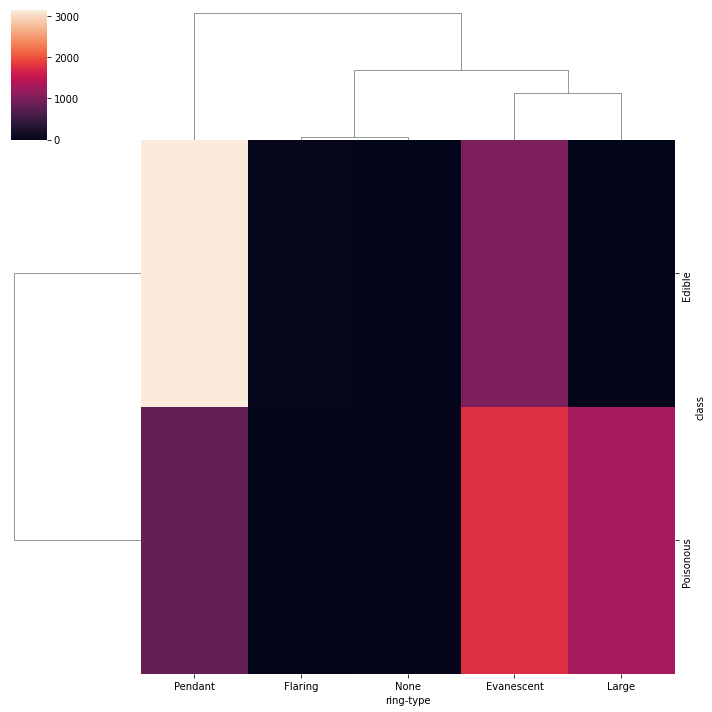

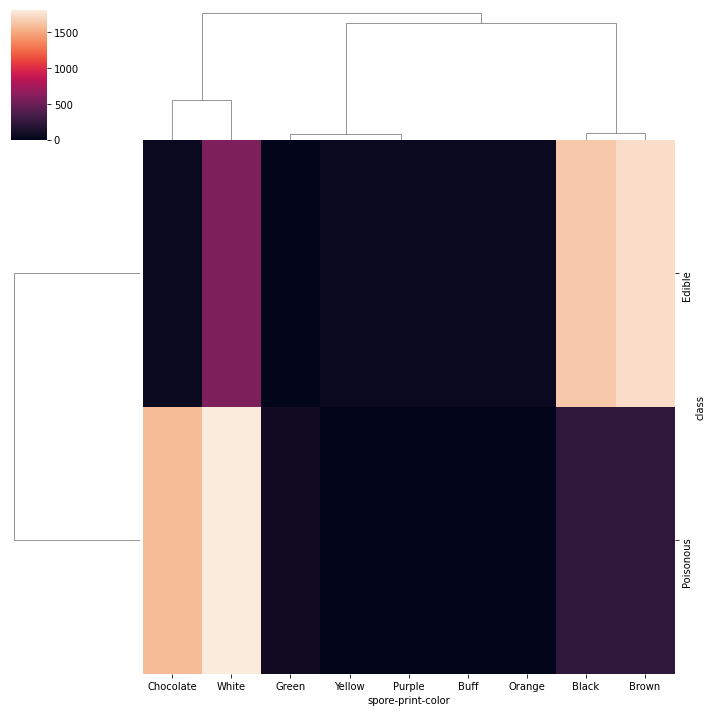

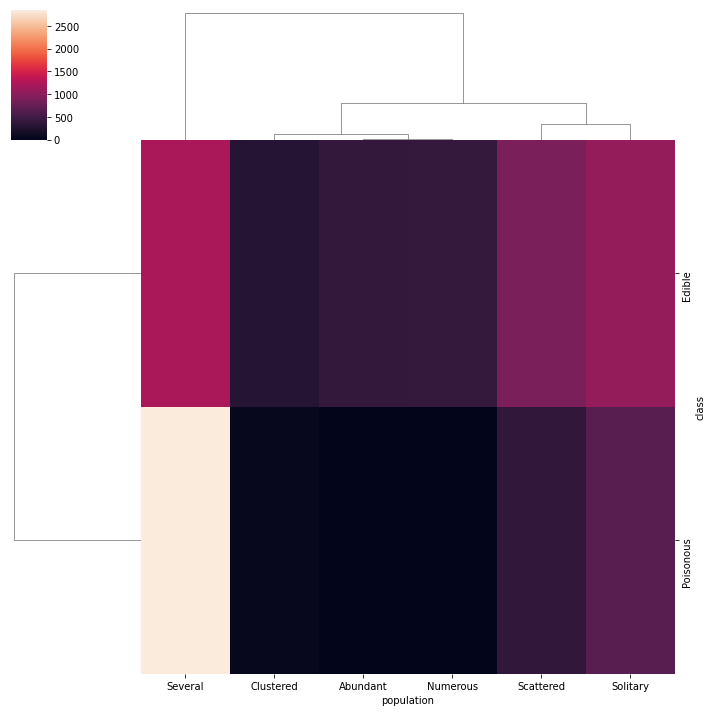

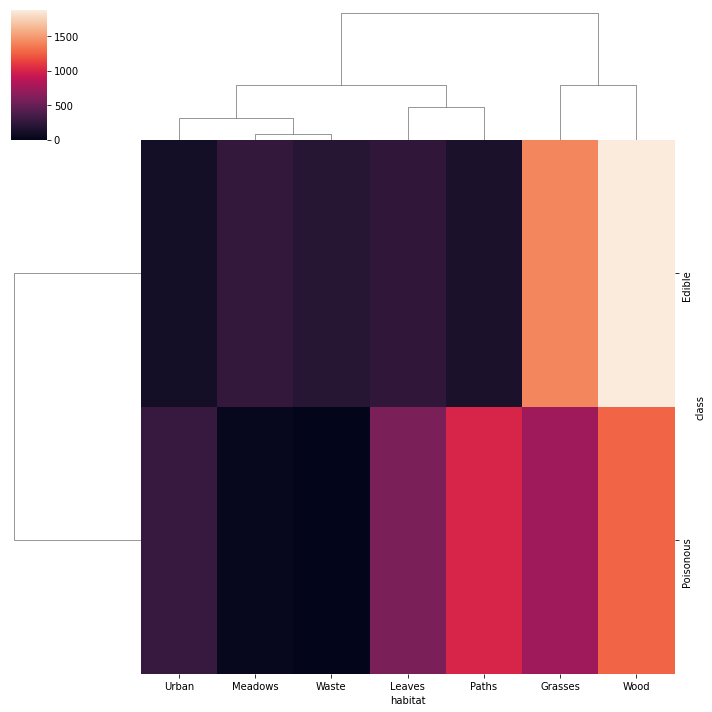

In [96]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        try:
            plt.show(sns.clustermap(pd.crosstab(data["class"], data[data.columns[i]])))
        except:
            pass

# Feature Transformation

1. Handling Categorical Features 


In [54]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [56]:
x = data.drop(columns="class")
y = data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [57]:
ohe = OneHotEncoder(drop="first", sparse=False)
x_train = ohe.fit_transform(x_train)
x_test = ohe.transform(x_test)

In [59]:
x_train.shape

(6499, 94)

In [61]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [64]:
y_train.shape

(6499,)

In [66]:
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [68]:
from collections import Counter

counter = Counter
print("BEFORE :",counter(y_train))
print("AFTER :",counter(y_train_sm))

BEFORE : Counter({0: 3348, 1: 3151})

AFTER : Counter({1: 3348, 0: 3348})


In [69]:
x_train_sm.shape

(6696, 94)

# Model Building

**Logistic Regression**

In [70]:
logr = LogisticRegression()
model = logr.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

99.87692307692308

**Decision Tree Classifier**

In [74]:
dtc = DecisionTreeClassifier()
model = dtc.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

46.400000000000006

In [85]:
score = []
for i in range(500):
    x = data.drop(columns="class")
    y = data["class"]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    ohe = OneHotEncoder(drop="first", sparse=False)
    x_train = ohe.fit_transform(x_train)
    x_test = ohe.transform(x_test)
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train_sm,y_train_sm)
    pred = dtc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  0

100.0


In [86]:
dtc = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
    
ohe = OneHotEncoder(drop="first", sparse=False)
x_train = ohe.fit_transform(x_train)
x_test = ohe.transform(x_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model2 = dtc.fit(x_train_sm,y_train_sm)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

100.0

**Random Forest Classifier**

In [87]:
rfc = RandomForestClassifier()
rfc.fit(x_train_sm,y_train_sm)
pred = rfc.predict(x_test)
accuracy_score(y_test, pred)*100

100.0

In [90]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT

mod1 = cross_val_score(LogisticRegression(), x_train, y_train, cv=10, scoring="accuracy")
print(np.round(np.mean(mod1),2)*100)

100.0


In [92]:
mod2 = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=10, scoring="accuracy")
print(np.round(np.mean(mod2),2)*100)

100.0


In [93]:
mod3 = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10, scoring="accuracy")
print(np.round(np.mean(mod3),2)*100)

100.0
